<a href="https://colab.research.google.com/github/Gayathri-achari/DL-COLAB/blob/Matrices/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numpy implementation of a simple recurrent neural network

In [12]:
import numpy as np
n_inputs = 10
n_hidden = 20
n_outputs = 1

weights = np.random.rand(n_inputs, n_hidden)
biases = np.zeros((n_hidden,))

output_weights = np.random.rand(n_hidden, n_outputs)
output_biases = np.zeros((n_outputs,))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def rnn(inputs):
    hidden_state = np.zeros((n_hidden,))
    for t in range(len(inputs)):
        hidden_state = tanh(np.dot(inputs[t], weights) + biases)
        output = sigmoid(np.dot(hidden_state, output_weights) + output_biases)

    return output

inputs = np.random.rand(10, n_inputs)
output = rnn(inputs)
print(output)

[0.9999161]


Create a recurrent layer in keras


In [14]:
from keras.models import Sequential
from keras.layers import SimpleRNN

# Define the number of inputs, hidden units, and outputs
n_inputs = 10
n_hidden = 20

# Create a model
model = Sequential()

# Add a SimpleRNN layer to the model
model.add(SimpleRNN(n_hidden, input_shape=(None, n_inputs)))

# Print the summary of the model
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 20)                  │             620 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620 (2.42 KB)

 Trainable params: 620 (2.42 KB)

 Non-trainable params: 0 (0.00 B)

None


Prepare IMDB data for movie review classification problem

In [15]:
from keras.datasets import imdb
from keras.preprocessing import sequence

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Pad the sequences to have the same length
max_length = 500
padded_train = sequence.pad_sequences(train_data, max_length)
padded_test = sequence.pad_sequences(test_data, max_length)

print("IMDb reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
             len(train_data[train_labels == 1]), len(train_data[train_labels == 0]),
             len(test_data[test_labels == 1]), len(test_data[test_labels == 0])))

IMDb reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


Train the model with embedding and simple RNN layers


In [16]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(SimpleRNN(64, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(padded_train, train_labels, epochs=10, batch_size=32, validation_data=(padded_test, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 228ms/step - accuracy: 0.6300 - loss: 0.6292 - val_accuracy: 0.5053 - val_loss: 0.9431
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 225ms/step - accuracy: 0.7466 - loss: 0.5014 - val_accuracy: 0.8119 - val_loss: 0.4441
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 224s 253ms/step - accuracy: 0.9008 - loss: 0.2531 - val_accuracy: 0.8013 - val_loss: 0.4871
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 185s 231ms/step - accuracy: 0.8619 - loss: 0.2923 - val_accuracy: 0.6548 - val_loss: 0.6126
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 227ms/step - accuracy: 0.7310 - loss: 0.5223 - val_accuracy: 0.6810 - val_loss: 0.6087
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 227ms/step - accuracy: 0.7980 - loss: 0.4192 - val_accuracy: 0.6730 - val_loss: 0.6454
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 226ms/step - accuracy: 0.7383 - loss: 0.4995 - val_accuracy: 0.6538 - val_loss: 0.6573
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 225ms/step - accuracy: 0.7794 -

Plot the Results

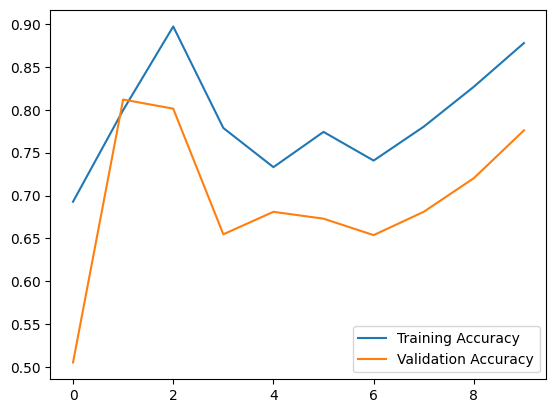

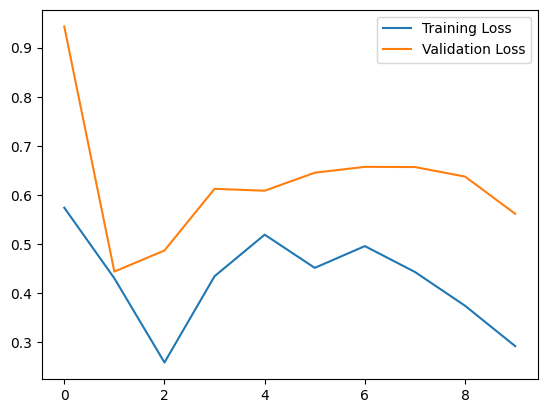

In [17]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()